<a href="https://colab.research.google.com/github/Kibmor/pet_projects/blob/main/GLOW_BYTE_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://lucid.app/lucidchart/bdb1728b-e0f3-4bf8-9ce1-3283c7023610/edit?viewport_loc=-270%2C118%2C2220%2C924%2CXd9YKfjApVpp&invitationId=inv_dfd432ad-ca81-4086-9413-afb82a490a78

Задания представлено по ссылке:

https://docs.google.com/document/d/15R-tLFNcroeTKHtxi3vlReI4fbum1W7flKeHz2Sr96k/edit?usp=sharing

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import random
from datetime import date, timedelta, datetime
from io import BytesIO
import requests
import matplotlib.pyplot as plt
import datetime

In [ ]:
def get_data(link):
  spreadsheet_id = link[link.find('d/')+2:link.find('/edit')]
  file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
  r = requests.get(file_name)
  data = pd.read_csv(BytesIO(r.content))
  return data


In [ ]:
def table_name(name):
    name_length=len(name)
    print('_'*name_length)
    print(name+':')
    print('- '*int((name_length/2)))

In [ ]:
def table_print(table,name):
  print(table_name(name))
  display(table)

In [ ]:
con = sqlite3.connect('test.db')
def table_get_in_db(table,t_table,qty=10):
  table.to_sql(t_table, con, index=False, if_exists='replace')
  table.name=t_table
  table_name(t_table)
  display(table.head(qty))

In [ ]:
def query(sql):
  return pd.read_sql(sql,con = sqlite3.connect('test.db'))

## Задание №1.
Имеется таблица A с учениками и их отметками по 5-балльной шкале, 2 поля (имя однозначно идентифицирует ученика):
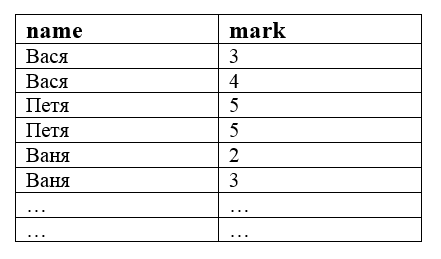

Задачи:
1.	Запрос: вывести имена всех учеников, у которых нет ни одной 5ки.
2.	Запрос: вывести количество троек, количество четверок и количество пятерок у Вани, желательно без подзапросов.
3.	Написать запрос для определения количества троек для учеников, у которых 10 и больше пятерок.


### Подготовка к 1 задаче:

In [ ]:
name =get_data('https://docs.google.com/spreadsheets/d/1_XXzXvFdnvTI00DuPPhthjoZrtItAZUzdPjhJBm7Or8/edit?usp=share_link')
name

,id,names
0,0,Александра
1,1,Алина
2,2,Алла
3,3,Анастасия
4,4,Анжела
...,...,...
79,79,Сергей
80,80,Станислав
81,81,Степан
82,82,Федор


In [ ]:
s = -3+np.random.weibull(6, 1700)*7
s=s.round()
s=s[np.where(s<=5)]
s=s[np.where(s>=2)]
dnevnik=pd.DataFrame({'names':np.random.choice(name['names'],size=len(s)),'mark':s})
dnevnik['mark']=dnevnik['mark'].astype('int')
table_get_in_db(dnevnik,t_table='dnevnik',qty=10)

_______
dnevnik:
- - - 


,names,mark
0,Вадим,3
1,Тамара,4
2,Алина,4
3,Таисия,5
4,Евгений,5
5,Михаил,4
6,Алексей,2
7,Алина,3
8,Тамара,2
9,Нина,4


,index,mark
0,4,529
1,3,438
2,5,317
3,2,243


<BarContainer object of 4 artists>

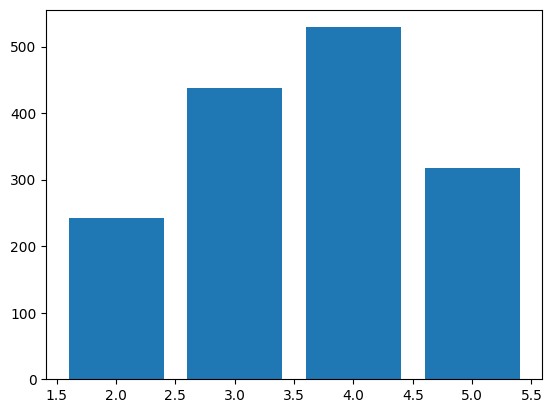

In [ ]:
mark_board=pd.DataFrame(dnevnik['mark'].value_counts()).reset_index()
display(mark_board)
plt.bar(mark_board['index'],mark_board['mark'])

### Решение 1 задания:

In [ ]:
s_query_1='''
with t1 as (select names,
                    count(*)
            from dnevnik
            where mark = 5
            group by names
            ),
t2 as (select names
        from t1
        )
select distinct names
from dnevnik as d
where d.names not in t2
'''
# 1.	Запрос: вывести имена всех учеников, у которых нет ни одной 5ки.
s_query_1=query(s_query_1)
s_query_1

,names
0,Клавдия


In [ ]:
s_query_2='''
select mark,
        count(*) as qty_of_mark
from dnevnik as d
where names='Иван'
group by mark
having mark in (3,4,5)
'''
#2.	Запрос: вывести количество троек, количество четверок и количество пятерок у Вани, желательно без подзапросов.
s_query_2=query(s_query_2)
s_query_2

,mark,qty_of_mark
0,3,9
1,4,5
2,5,6


In [ ]:
s_query_4='''
select names,
              count(*) as qty_of_mark_5
        from dnevnik as d
        where mark=5
        group by names
        having qty_of_mark_5>=10

'''
#2.	Запрос: вывести количество троек, количество четверок и количество пятерок у Вани, желательно без подзапросов.
query_4=query(s_query_4)
query_4

,names,qty_of_mark_5


In [ ]:
s_query_3='''
with
t1 as (select names,
              count(*) as qty_of_mark_5
        from dnevnik as d
        where mark=5
        group by names
        having qty_of_mark_5>=10
        )
select distinct names,
                count(mark)  OVER (PARTITION BY  names ORDER BY names) as qty_of_mark_3
from dnevnik as d
where d.names in (select names
                  from t1)
      and mark=3
'''
#2.	Запрос: вывести количество троек, количество четверок и количество пятерок у Вани, желательно без подзапросов.
s_query_3=query(s_query_3)
s_query_3

,names,qty_of_mark_3


##Задание №2. Проектирование БД

1.1. **Формулировка предметной области**

Спроектировать базу данных(перечень таблиц , их атрибутивный состав и первичный ключ, связи таблиц между собой) по продаже железнодорожных билетов в пределах России.
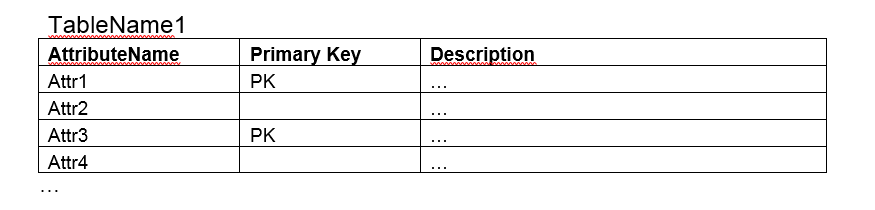

1.2. **Конкретизация предметной области**

Ставится задача  создания системы контролирующей покупку/продажу железнодорожных билетов.

Описанная в данной работе система должна хранить  информацию о расписании движения поездов, проданных и свободных билетах.

1.3. **Требования по хранению данных**

В данной базе должна хранится информация о билетах в течение двух месяцев (за прошедший месяц и на месяц вперед, поскольку билеты поступают в продажу за 30 дней до отправления поезда). Информация о рейсах хранится в базе в течение полугода (это связано с переходами на летнее или зимнее расписание).

1.4. **Пользователи системы**

Система рассчитана на следующих пользователей:

*	кассиров ржд, которым необходима информация о поездах и имеющихся в продаже билетах;
*	администраторов системы (добавление информации об изменениях в расписании, внесение нового расписания).

1.5. **Сроки хранения информации**

Архивирование БД происходит каждые два месяца. Вся информация хранится в оперативной базе в течение трех месяцев, и переносится из оперативной БД в ближний архив при архивировании.

1.6. **События, изменяющие состояние БД**

Изменение состояния базы данных происходит в результате:

*	покупки билета на какой-либо рейс (дальнего следования);
*	возврата билета на какой-либо рейс;
*	изменения в расписании (отмена поезда, отмена остановки на станции, изменение даты/времени).

1.7. **Основные запросы к БД на естественном языке.**
1. Q1	Есть ли рейс из пункта А в пункт В на  хх.хх  число?
2. Q2	Какие изменения в расписании для рейса №Х на хх.хх  число?
3. Q3	В какое время прибывает рейс №Х на станции А?
4. Q4	Есть ли билет из пункта А в пункт В на  хх.хх  число?
5. Q5	Есть ли плацкартное место на рейс №Х из пункта А в пункт В на хх.хх число?
6. Q6	Вывести пассажира, который совершил больше всего поездок. Если таких пассажиров несколько, то из этих пассажиров вывести того, кто ездил по наибольшему числу направлений.

Необходимо написать SQL запросы к созданной БД для получения ответов на эти вопросы.


#БЛОК СХЕМА

https://lucid.app/lucidchart/bdb1728b-e0f3-4bf8-9ce1-3283c7023610/edit?viewport_loc=-270%2C118%2C2220%2C924%2CXd9YKfjApVpp&invitationId=inv_dfd432ad-ca81-4086-9413-afb82a490a78

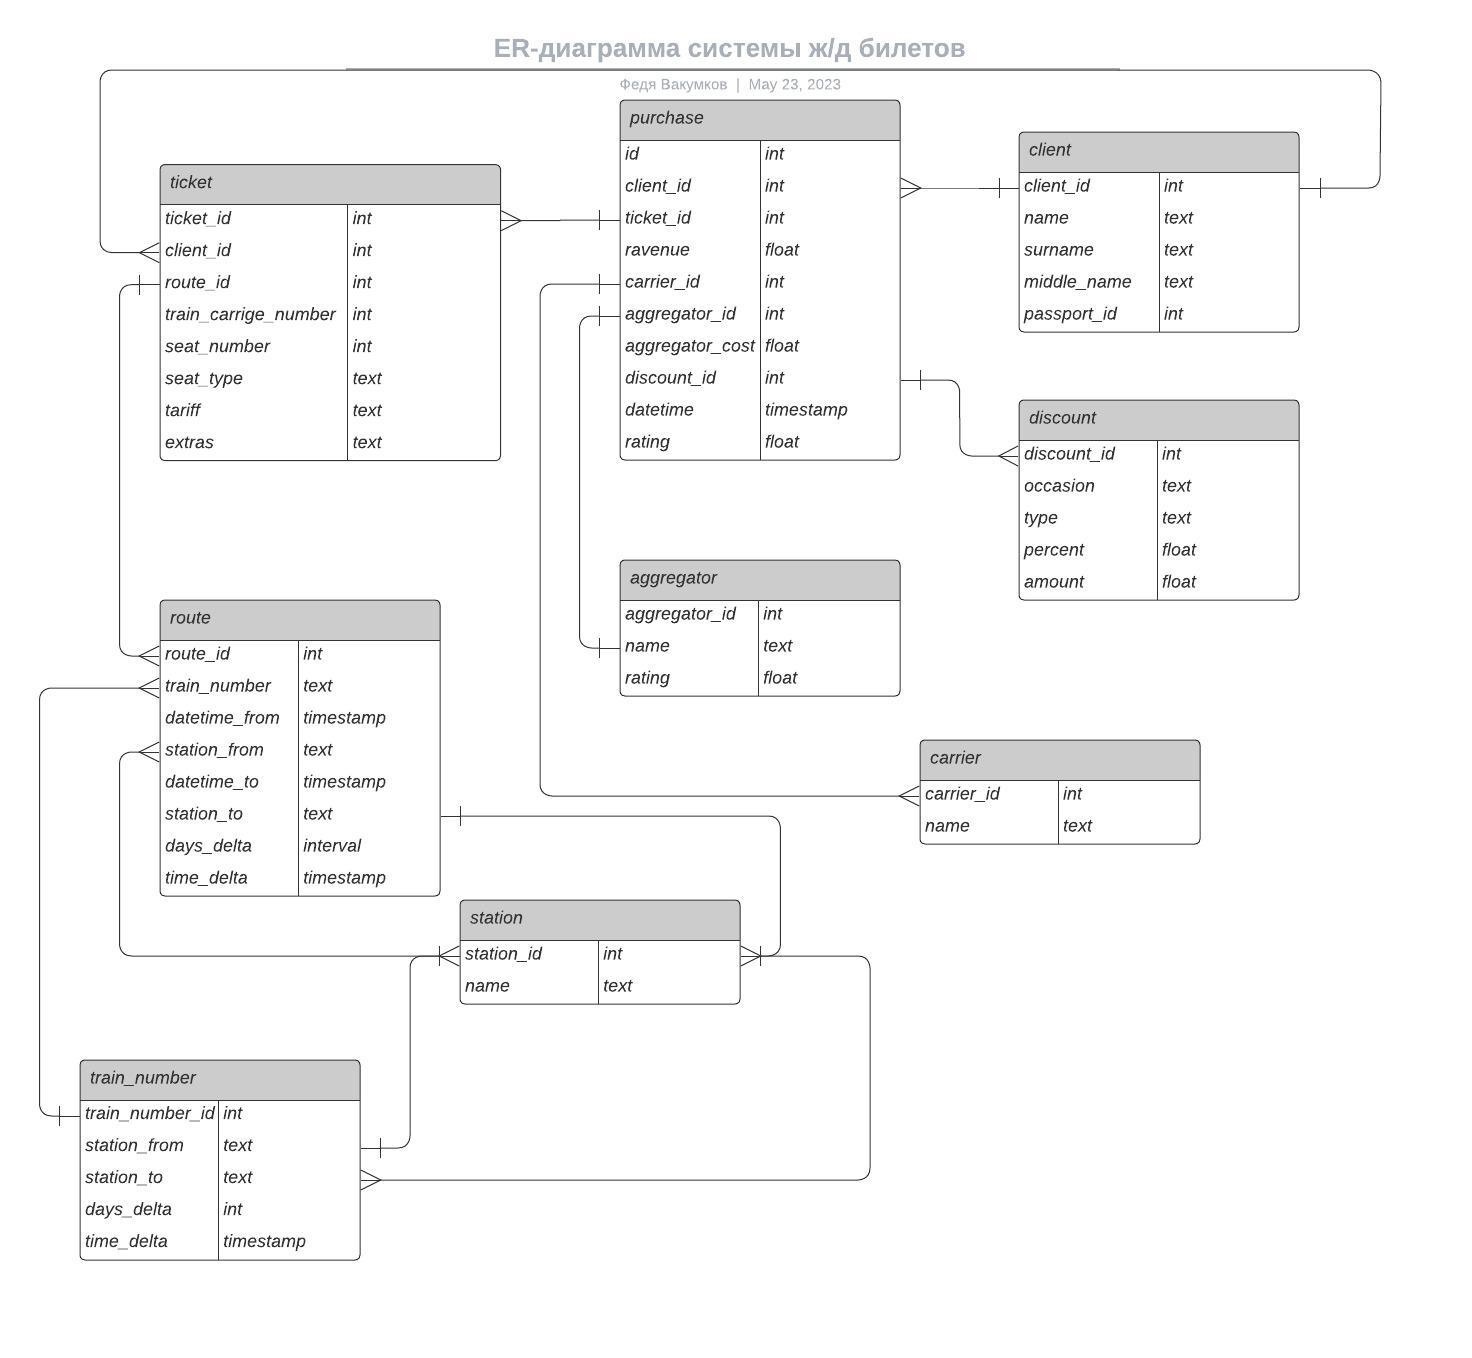

## Подготовка к 2 задаче:

In [ ]:
station=get_data('https://docs.google.com/spreadsheets/d/1Z-jImdeuhTJHmqeO2Q4f0mayC8PSt8Y2ouuMqlz0pm4/edit?usp=share_link')
station['station_name']=station['station_name'].str.lower()
for x in station['station_name'].index:
  station.loc[x,'station_name']=station.loc[x,'station_name'].title()
table_get_in_db(station,'station',qty=10)

_______
station:
- - - 


,id,station_name
0,0,Абакан
1,1,Абдулино
2,2,Агрыз
3,3,Адлер
4,4,Аксаково
5,5,Алейская
6,6,Анапа
7,7,Ангарск
8,8,Анжерская
9,9,Арзамас 1


In [ ]:
import seaborn as sns

<Axes: ylabel='Count'>

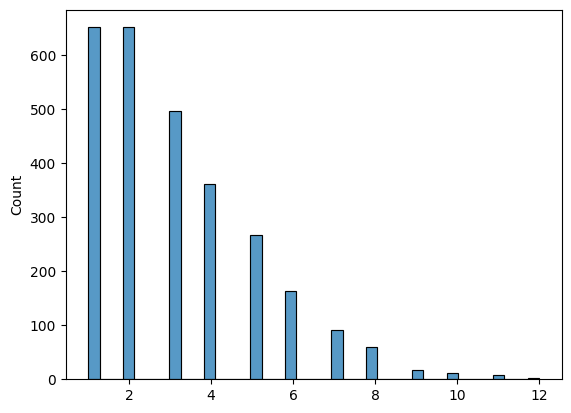

In [ ]:
s8 = np.random.normal(1, 3, 5000)
s8=s8.round().astype('int')
s8=s8[np.where(s8<=24)]
s8=s8[np.where(s8>=1)]
sns.histplot(s8)

In [ ]:
train_number_id=[]
for i in range(1,738):
    train_number_id.append(i)
train_number=pd.DataFrame({'train_number_id':train_number_id})
s8 = np.random.normal(0, 120, 5000)
s8=s8.round().astype('int')
s8=s8[np.where(s8<=station.shape[0]-1)]
s8=s8[np.where(s8>=0)]

s2= np.random.lognormal(2.4, 0.5, 10000)
s2=s2.round()
s2=s2[np.where(s2<=143)]
for x in train_number.index:
  train_number.loc[x,'station_from']=s8[random.choice(range(0,len(s8)-1))]
  train_number.loc[x,'station_to']=s8[random.choice(range(0,len(s8)-1))]
  train_number.loc[x,'timedelta']=timedelta(hours=s2[random.randint(0,train_number.shape[0]-1)],
                                                          minutes=random.randint(0,59))
  train_number.loc[x,'days_delta']=int(str(train_number.loc[x,'timedelta'])[0])
  train_number.loc[x,'time_delta']=str(train_number.loc[x,'timedelta'])[7:15]
train_number=train_number[train_number['station_from']!=train_number['station_to']]

train_number[['station_from',	'station_to',	'days_delta']]=train_number[['station_from',	'station_to',	'days_delta']].astype('int')
table_get_in_db(train_number.drop(columns='timedelta'),'train_number',qty=10)

____________
train_number:
- - - - - - 


<ipython-input-15-adcf718174da>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_number[['station_from',	'station_to',	'days_delta']]=train_number[['station_from',	'station_to',	'days_delta']].astype('int')


,train_number_id,station_from,station_to,days_delta,time_delta
0,1,52,29,0,04:21:00
1,2,131,147,0,11:19:00
2,3,74,14,0,15:35:00
3,4,24,143,0,07:51:00
4,5,11,127,0,10:50:00
5,6,82,55,0,14:53:00
6,7,112,124,0,22:58:00
7,8,191,31,0,07:12:00
8,9,157,232,0,08:13:00
9,10,187,184,0,14:49:00


In [ ]:
route_id=[]
for i in range(2000):
    route_id.append(i)
route=pd.DataFrame({'route_id':route_id})
nownow=datetime.datetime(datetime.datetime.now().year,
                  datetime.datetime.now().month,
                  datetime.datetime.now().day,
                  datetime.datetime.now().hour,
                  datetime.datetime.now().minute
                  ,second=0)
start_date = nownow-timedelta(days=30)
end_date = nownow+timedelta(days=30)
for i in route.index:
  route.loc[i,'train_number']=int(round(random.choice(range(train_number['train_number_id'].min(),train_number['train_number_id'].max()))))
route['train_number']=route['train_number'].astype('int')
route=route.merge(train_number,left_on='train_number', right_on='train_number_id')
route=route.drop(columns='train_number_id')
for i in route.index:
  route.loc[i,'datetime_from'] = start_date + timedelta(days=random.randint(0, (end_date - start_date).days),
                                                          hours=random.randint(0,23),
                                                          minutes=random.randint(0,59))
route['datetime_to']=route['datetime_from']+route['timedelta']
route=route.sort_values(by='datetime_from').reset_index(drop=True)
route=route.drop(columns='timedelta')
table_get_in_db(route,'route',qty=10)

_____
route:
- - 


,route_id,train_number,station_from,station_to,days_delta,time_delta,datetime_from,datetime_to
0,16,298,173,148,0,18:41:00,2023-05-14 17:31:00,2023-05-15 12:12:00
1,785,188,41,30,0,13:41:00,2023-05-14 17:58:00,2023-05-15 07:39:00
2,1817,271,54,101,0,06:58:00,2023-05-14 19:09:00,2023-05-15 02:07:00
3,1673,528,28,19,0,15:06:00,2023-05-14 20:43:00,2023-05-15 11:49:00
4,528,661,9,175,0,11:06:00,2023-05-14 20:50:00,2023-05-15 07:56:00
5,980,486,65,58,0,17:11:00,2023-05-14 21:15:00,2023-05-15 14:26:00
6,525,11,99,67,0,06:31:00,2023-05-14 21:32:00,2023-05-15 04:03:00
7,925,706,6,3,0,08:01:00,2023-05-14 21:37:00,2023-05-15 05:38:00
8,864,124,122,32,0,04:25:00,2023-05-14 22:05:00,2023-05-15 02:30:00
9,1234,75,4,81,0,11:47:00,2023-05-14 23:31:00,2023-05-15 11:18:00


In [ ]:
name=get_data('https://docs.google.com/spreadsheets/d/1_XXzXvFdnvTI00DuPPhthjoZrtItAZUzdPjhJBm7Or8/edit?usp=share_link')
name.head()

,id,names
0,0,Александра
1,1,Алина
2,2,Алла
3,3,Анастасия
4,4,Анжела


In [ ]:
surname=get_data('https://docs.google.com/spreadsheets/d/1-GpgSBfhMTRxQmGfaIcVgol0NT78fAQP1-wMFAHRiWQ/edit?usp=share_link')
surname.head()

,id,surname
0,0,Смирнов
1,1,Иванов
2,2,Кузнецов
3,3,Соколов
4,4,Попов


In [ ]:
middle_name=get_data('https://docs.google.com/spreadsheets/d/1VLeEqrIAejI9u6aPbkhoeJvr7StuwR5lqhdmSLXl4wc/edit?usp=share_link')
middle_name.head()

,id,middle_name
0,0,Александрович
1,1,Алексеевич
2,2,Анатольевич
3,3,Андреевич
4,4,Антонович


In [ ]:
client_id=[]
for i in range(5000):
    client_id.append(i)
client=pd.DataFrame({'client_id':client_id})
s3=np.random.default_rng().triangular(0, 0, 49, 5000)
for y in client.index:
  client.loc[y,'namе']=name.loc[int(round(s3[random.randint(0,4999)])),'names']
  client.loc[y,'surname']=surname.loc[int(round(s3[random.randint(0,4999)])),'surname']
  client.loc[y,'middle_name']=middle_name.loc[random.randint(0,middle_name.shape[0]-1),'middle_name']
  client.loc[y,'passport_id']=random.randint(1000000000,9999999999)
client['passport_id']=client['passport_id'].astype('int')
table_get_in_db(client,'client',qty=10)

______
client:
- - - 


,client_id,namе,surname,middle_name,passport_id
0,0,Лидия,Голубев,Владимирович,4677610982
1,1,Алина,Виноградов,Петрович,2266029019
2,2,Валентина,Лебедев,Максимович,2096719957
3,3,Виктория,Козлов,Валерьевич,9441720346
4,4,Мария,Петров,Викторович,2083362487
5,5,Надежда,Кузнецов,Геннадиевич,3842968625
6,6,Алла,Гусев,Тарасович,6569056437
7,7,Алина,Комаров,Андреевич,7932400898
8,8,Таисия,Павлов,Семенович,6216322114
9,9,Кира,Волков,Геннадиевич,4065411042


In [ ]:
ticket_id=[]
for i in range(10000):
    ticket_id.append(i)
ticket=pd.DataFrame({'ticket_id':ticket_id})
s4 = np.random.normal(12, 5, 5000)
s4=s4.round().astype('int')
s4=s4[np.where(s4<=20)]
s4=s4[np.where(s4>=6)]
for x in ticket.index:
  ticket.loc[x,'client_id']=client.loc[random.randint(0,client.shape[0]-1),'client_id']
  ticket.loc[x,'route_id']=route. loc[random.randint(0,route. shape[0]-1),'route_id']
  ticket.loc[x,'train_carrige_number']=random.randint(1,16)
  ticket.loc[x,'seat_number']=random.randint(1,54)
ticket=ticket.astype('int')
railway_carriage_type=['Сидячий вагон','Плацкартный вагон','Купе', 'СВ', 'РИЦ']
for x in ticket.index:
    ticket.loc[x,'railway_carriage_type']=railway_carriage_type[random.randint(0,len(railway_carriage_type)-1)]
    for cycle1 in ticket[(ticket['railway_carriage_type']!='Сидячий вагон')&(ticket['railway_carriage_type']!='РИЦ')].index:
      if cycle1==x:
        ticket.loc[x,'seat_type']=['верхнее место', 'нижнее место'][random.randint(0,1)]
    for cycle2 in ticket[ticket['railway_carriage_type']=='Сидячий вагон'].index:
      if cycle2==x:
        ticket.loc[x,'seat_type']=['у стола', 'не у стола'][random.randint(0,1)]
ticket['extras']=None
table_get_in_db(ticket,'ticket',qty=10)

______
ticket:
- - - 


,ticket_id,client_id,route_id,train_carrige_number,seat_number,railway_carriage_type,seat_type,extras
0,0,778,550,14,4,Плацкартный вагон,верхнее место,None
1,1,4396,1554,12,28,Плацкартный вагон,верхнее место,None
2,2,4650,1821,2,39,Плацкартный вагон,верхнее место,None
3,3,2629,1026,15,13,РИЦ,NaN,None
4,4,3940,547,6,17,Плацкартный вагон,нижнее место,None
5,5,4574,1674,15,40,Купе,верхнее место,None
6,6,727,371,6,15,Плацкартный вагон,верхнее место,None
7,7,655,1417,11,10,Плацкартный вагон,нижнее место,None
8,8,3724,1041,11,11,СВ,нижнее место,None
9,9,3377,400,13,27,РИЦ,NaN,None


In [ ]:
purchase_id=[]
for i in range(10000):
    purchase_id.append(i)
purchase=pd.DataFrame({'purchase_id':purchase_id})
for x in purchase.index:
  purchase.loc[x,'client_id']=client.loc[random.randint(0,client.shape[0]-1),'client_id']
purchase=purchase.astype('int')
purchase=purchase.join(ticket[['ticket_id','client_id']],on='client_id',lsuffix='l').drop(columns=['client_idl'])
s5 = np.random.gamma(3, 1800, 10000)
s5=s5.round().astype('int')
s5=s5[np.where(s5<=40000)]
s5=s5[np.where(s5>=788)]
carrier=get_data('https://docs.google.com/spreadsheets/d/1ryFX20FZifTWZlr0eac_o7jasIOATRvwJ7JS0QAuVgw/edit?usp=share_link')
aggregator=get_data('https://docs.google.com/spreadsheets/d/1zzgvT7lCwleFNkQNT6gEci1yZa3CgfooS4iTglIlUnw/edit?usp=share_link')
discount=get_data('https://docs.google.com/spreadsheets/d/1zV9E9gVjody3Ty8z_M-Xq6o0zaRrXAP3KLvMtcCPDsA/edit?usp=share_link')
carrier['carrier_id']=carrier['carrier_id'].astype('int')
aggregator['aggregator_id']=aggregator['aggregator_id'].astype('int')
s6 = np.random.uniform(low=0, high=10000, size=5000)
s6=s6.round().astype('int')
for x in purchase.index:
  purchase.loc[x,'revenue']=s5[random.randint(0,len(s5)-1)]
  purchase.loc[x,'carrier_id']=carrier.loc[random.randint(0,carrier.shape[0]-1),'carrier_id']
  purchase.loc[x,'aggregator_id']=aggregator.loc[random.randint(0,aggregator.shape[0]-1),'aggregator_id']
  if x in s6:
    purchase.loc[x,'discount_id']=discount.loc[random.randint(0,discount.shape[0]-1),'discount_id']
purchase[['carrier_id',	'aggregator_id']]=purchase[['carrier_id',	'aggregator_id']].astype('int')
purchase['discount_id']=purchase['discount_id'].astype('Int64')
purchase=purchase.join(ticket[['ticket_id','route_id']].join(route[['route_id','datetime_from']],rsuffix='rr',
                                                    on='route_id'),rsuffix='rt',on='ticket_id').drop(columns=['ticket_idrt',	'route_id',	'route_idrr'])
for x in purchase.index:
  purchase.loc[x,'datetime']=purchase.loc[x,'datetime_from']-timedelta(seconds=int(round(np.random.gamma(9.07,100000, 10000,)[random.randint(0,9999)])))
purchase=purchase.drop(columns='datetime_from')
table_get_in_db(purchase,'purchase',qty=10)

________
purchase:
- - - - 


,purchase_id,ticket_id,client_id,revenue,carrier_id,aggregator_id,discount_id,datetime
0,0,3674,739,2443.0,1,9,<NA>,2023-05-08 00:45:22
1,1,2077,1118,3061.0,4,5,<NA>,2023-07-01 02:30:08
2,2,2440,4154,4601.0,4,4,<NA>,2023-06-16 22:17:46
3,3,1071,1058,6114.0,1,8,<NA>,2023-06-28 13:55:15
4,4,1558,192,1892.0,4,5,2,2023-06-10 15:22:19
5,5,22,1576,4744.0,4,1,<NA>,2023-05-14 04:06:46
6,6,1325,954,5774.0,2,8,<NA>,2023-06-28 11:02:09
7,7,2068,2114,4948.0,3,8,<NA>,2023-06-19 17:53:48
8,8,3427,1983,5988.0,4,5,<NA>,2023-05-09 22:36:48
9,9,3366,1603,4727.0,4,3,<NA>,2023-05-02 01:15:39


In [ ]:
proverka=route[route['train_number']==pd.DataFrame(route['train_number'].value_counts()).index[0]].join(station, on='station_from',lsuffix='l').join(station, on='station_to', rsuffix= 'r').head(1).reset_index(drop=True)
proverka=proverka.merge(station)
proverka

,route_id,train_number,station_from,station_to,days_delta,time_delta,datetime_from,datetime_to,id,station_name,idr,station_namer
0,1298,413,192,75,0,10:38:00,2023-05-17 11:53:00,2023-05-17 22:31:00,192,Нижний Тагил,75,Дальнереченск 1


In [ ]:
date_2_1=datetime.datetime.strptime(str(proverka['datetime_from'].max()),'%Y-%m-%d %H:%M:%S').date()
print(date_2_1)

2023-05-17


## Решение 2 задания: функциии и выводы с 2_№ (где № - номер запроса):

In [ ]:
#parametr_2_1(date=None,a=None,b=None)   -  |  1 запрос : Есть ли рейс из пункта А в пункт В на  хх.хх  число?
                                           #|
#parametr_2_2(train_n=None,a=None,b=None) - |  2 запрос : Какие изменения в расписании для рейса №Х на хх.хх  число?
                                           #|
#parametr_2_3(train_n=None,a=None)    -     |  3 запрос : В какое время прибывает рейс №Х на станции А?
                                           #|
#parametr_2_4(date=None,a=None,b=None)  -   |  4 запрос : Есть ли билет из пункта А в пункт В на  хх.хх  число?
                                           #|
#parametr_2_5(date=None,a=None,b=None)  -   |  5 запрос : Есть ли плацкартное место на рейс №Х из пункта А в пункт В на хх.хх число?
                                           #|
#query_2_6                       -          |  6 запрос : Вывести пассажира, который совершил больше всего поездок. Если таких пассажиров несколько, то из этих пассажиров
#                                          #|          вывести того, кто ездил по наибольшему числу направлений.

In [ ]:
def parametr_2_1(date=None,a=None,b=None):
  s_query_2_1=f'''
  select *
  from route as r
  where station_from=(select id
                      from station as s
                      where station_name='{a}')
        and  station_to=(select id
                      from station as s
                      where station_name='{b}')
        and date(datetime_from)='{date}'
  '''
  # 1 запрос : Есть ли рейс из пункта А в пункт В на  хх.хх  число?
  query_parametr_2_1=query(s_query_2_1)
  table_name(name=f'Рейсы из пункта {a} в {b} за конкретную дату - {date} ')
  display(query_parametr_2_1)
parametr_2_1(date=date_2_1,a=proverka.loc[0,'station_name'],b=proverka.loc[0,'station_namer'])

_______________________________________________________________________________
Рейсы из пункта Нижний Тагил в Дальнереченск 1 за конкретную дату - 2023-05-17 :
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,route_id,train_number,station_from,station_to,days_delta,time_delta,datetime_from,datetime_to
0,1298,413,192,75,0,10:38:00,2023-05-17 11:53:00,2023-05-17 22:31:00


In [ ]:
proverka.merge(station).loc[0,'station_namer']

'Дальнереченск 1'

In [ ]:
def parametr_2_2(train_n=None,a=None,b=None):
  s_query_2_2=f'''
  select *
  from route as r
  where train_number= {train_n}
  '''
### 2 запрос : Какие изменения в расписании для рейса №Х на хх.хх  число?
  query_parametr_2_2=query(s_query_2_2)
  table_name(name=f'Изменение в расписании для рейса {train_n} - {a} - {b} ')
  display(query_parametr_2_2)
parametr_2_2(train_n=proverka.loc[0,'train_number'],a=proverka.loc[0,'station_name'],b=proverka.loc[0,'station_namer'])

______________________________________________________________________
Изменение в расписании для рейса 413 - Нижний Тагил - Дальнереченск 1 :
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,route_id,train_number,station_from,station_to,days_delta,time_delta,datetime_from,datetime_to
0,1298,413,192,75,0,10:38:00,2023-05-17 11:53:00,2023-05-17 22:31:00
1,1736,413,192,75,0,10:38:00,2023-05-28 20:37:00,2023-05-29 07:15:00
2,333,413,192,75,0,10:38:00,2023-06-14 01:34:00,2023-06-14 12:12:00
3,786,413,192,75,0,10:38:00,2023-06-16 20:12:00,2023-06-17 06:50:00
4,1510,413,192,75,0,10:38:00,2023-06-21 10:34:00,2023-06-21 21:12:00
5,1350,413,192,75,0,10:38:00,2023-06-27 23:00:00,2023-06-28 09:38:00
6,1271,413,192,75,0,10:38:00,2023-07-01 05:47:00,2023-07-01 16:25:00
7,995,413,192,75,0,10:38:00,2023-07-05 00:28:00,2023-07-05 11:06:00
8,633,413,192,75,0,10:38:00,2023-07-05 13:00:00,2023-07-05 23:38:00


In [ ]:
def parametr_2_3(train_n=None,a=None):
  s_query_2_3=f'''
  select datetime_from
  from route as r
  where train_number={train_n}
  and station_from in (select id
                        from station as s
                        where station_name='{a}')

  '''
### 3 запрос : В какое время прибывает рейс №Х на станции А?
  query_parametr_2_3=query(s_query_2_3)
  table_name(name=f'Время прибытия рейса {train_n} на станции {a}  ')
  display(query_parametr_2_3)
parametr_2_3(train_n=proverka.loc[0,'train_number'],a=proverka.loc[0,'station_name'])

__________________________________________________
Время прибытия рейса 413 на станции Нижний Тагил  :
- - - - - - - - - - - - - - - - - - - - - - - - - 


,datetime_from
0,2023-05-17 11:53:00
1,2023-05-28 20:37:00
2,2023-06-14 01:34:00
3,2023-06-16 20:12:00
4,2023-06-21 10:34:00
5,2023-06-27 23:00:00
6,2023-07-01 05:47:00
7,2023-07-05 00:28:00
8,2023-07-05 13:00:00


In [ ]:
def parametr_2_4(date=None,a=None,b=None):
  s_query_2_4=f'''
  select ticket_id,	client_id	route_id,	train_carrige_number,	seat_number,	railway_carriage_type,	seat_type,	extras
  from route as r
  join ticket as t on r.route_id=t.route_id
  where station_from=(select id
                      from station as s
                      where station_name='{a}')
        and  station_to=(select id
                      from station as s
                      where station_name='{b}')
        and date(datetime_from)='{date}'
  '''
### 4 запрос : Есть ли билет из пункта А в пункт В на  хх.хх  число?
  query_parametr_2_4=query(s_query_2_4)
  table_name(name=f'Рейсы из пункта {a} в {b} за конкретную дату - {date} ')
  display(query_parametr_2_4)
parametr_2_4(date=date_2_1,a=proverka.loc[0,'station_name'],b=proverka.loc[0,'station_namer'])

_______________________________________________________________________________
Рейсы из пункта Нижний Тагил в Дальнереченск 1 за конкретную дату - 2023-05-17 :
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,ticket_id,route_id,train_carrige_number,seat_number,railway_carriage_type,seat_type,extras
0,1816,4481,7,50,Плацкартный вагон,верхнее место,None
1,2179,2321,13,41,Плацкартный вагон,нижнее место,None
2,2196,1221,14,25,Сидячий вагон,у стола,None
3,5826,533,9,1,СВ,нижнее место,None


In [ ]:
def parametr_2_5(date=None,a=None,b=None):
  s_query_2_5=f'''
  select ticket_id,	client_id	route_id,	train_carrige_number,	seat_number,	railway_carriage_type,	seat_type,	extras,train_number
  from route as r
  join ticket as t on r.route_id=t.route_id
  where station_from=(select id
                      from station as s
                      where station_name='{a}')
        and  station_to=(select id
                      from station as s
                      where station_name='{b}')
        and date(datetime_from)='{date}'
        and railway_carriage_type='Плацкартный вагон'
  '''
### 5 запрос : Есть ли плацкартное место на рейс №Х из пункта А в пункт В на хх.хх число?
  query_parametr_2_5=query(s_query_2_5)
  c=query_parametr_2_5['train_number'].unique()[0]
  table_name(name=f'Плацкартные места поезда {c} из пункта {a} в {b} за конкретную дату - {date} ')
  display(query_parametr_2_5)
parametr_2_5(date=date_2_1,a=proverka.loc[0,'station_name'],b=proverka.loc[0,'station_namer'])

______________________________________________________________________________________________________
Плацкартные места поезда 413 из пункта Нижний Тагил в Дальнереченск 1 за конкретную дату - 2023-05-17 :
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,ticket_id,route_id,train_carrige_number,seat_number,railway_carriage_type,seat_type,extras,train_number
0,1816,4481,7,50,Плацкартный вагон,верхнее место,None,413
1,2179,2321,13,41,Плацкартный вагон,нижнее место,None,413


In [ ]:
s_query_2_6='''
with
t1 as (select client_id, count(ticket_id) as cnt_ticket
          from ticket as t
          group by client_id),
t2 as (select t1.client_id, max(cnt_ticket) as max_cnt_ticket
        from t1
        join client as c on t1.client_id=c.client_id),
t3 as (select t2.client_id,count(train_number) as cnt_route
      from route as r
      join ticket as t on r.route_id=t.route_id
      join t2 on t2.client_id=t.client_id
      group by t2.client_id),
t4 as (select t3.client_id, max(cnt_route) as max_cnt_route
        from t3)
select case
            when count(distinct c.client_id)=1 then max_cnt_ticket
            when count(distinct c.client_id)>1 then max_cnt_route
        END  as max_ticket_or_route_wins
from client as c
join t2 on t2.client_id=c.client_id
join t4 on t4.client_id=c.client_id
'''
### 6 запрос : Вывести пассажира, который совершил больше всего поездок. Если таких пассажиров несколько, то из этих пассажиров
#             вывести того, кто ездил по наибольшему числу направлений.
query_2_6=query(s_query_2_6)
table_name(name=f'''Вывести пассажира, который совершил больше всего поездок.
Если таких пассажиров несколько, то из этих пассажиров вывести того, кто ездил по наибольшему числу направлений''')
display(query_2_6)


_________________________________________________________________________________________________________________________________________________________________________
Вывести пассажира, который совершил больше всего поездок.
Если таких пассажиров несколько, то из этих пассажиров вывести того, кто ездил по наибольшему числу направлений:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,max_ticket_or_route_wins
0,8
